In [223]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [224]:
import pandas as pd
test_data = pd.read_csv('test.tsv', sep='\t')
train_data = pd.read_csv('train.tsv', sep='\t')

In [225]:
from sklearn.model_selection import train_test_split

#ターゲットと特徴量の分離
X = train_data.drop(columns=['class'])
y = train_data['class']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (249, 5)
Validation set shape: (63, 5)


In [226]:
test_data.head()

,Unnamed: 0,left_weight,left_distance,right_weight,right_distance
0,0,4,5,4,3
1,1,3,2,1,5
2,3,1,4,5,1
3,4,5,4,4,4
4,5,2,2,4,1


In [227]:
# カラム名をリストとして設定
column_names =['id', 'left_weight', 'left_distance', 'right_weight','right_distance']
# DataFrameのカラム名を設定
X_train.columns = column_names
X_val.columns = column_names
test_data.columns = column_names
print(test_data.head())


   id  left_weight  left_distance  right_weight  right_distance
0   0            4              5             4               3
1   1            3              2             1               5
2   3            1              4             5               1
3   4            5              4             4               4
4   5            2              2             4               1


In [228]:
id_train = X_train['id']
X_train_data = X_train.drop(columns='id')

In [229]:
id_val = X_val['id']
X_val_data = X_val.drop(columns='id')

In [230]:
id_test = test_data['id']
test_data = test_data.drop(columns='id')

In [231]:
X_train_data.head()

,left_weight,left_distance,right_weight,right_distance
111,4,3,1,3
208,3,2,4,1
145,4,4,3,3
203,3,5,2,3
78,5,3,5,5


In [232]:
# LightGBMのデータセット形式に変換
lgb_train = lgb.Dataset(X_train_data, y_train)
lgb_val = lgb.Dataset(X_val_data, y_val, reference=lgb_train)
lgb_test = lgb.Dataset(test_data)

In [233]:
params = {
    'objective': 'multiclass',  # 多クラス分類
    'num_class': 3,  # クラスの数
    'metric': 'multi_logloss'  # 損失関数にmulti_loglossを使用
}

In [234]:
gbm = lgb.train(params, lgb_train ,valid_sets=lgb_val)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 249, number of used features: 4
[LightGBM] [Info] Start training from score -0.798954
[LightGBM] [Info] Start training from score -2.521721
[LightGBM] [Info] Start training from score -0.755279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

c:\Users\Ryogi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ryogi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35542 (\N{CJK UNIFIED IDEOGRAPH-8AD6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ryogi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ryogi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


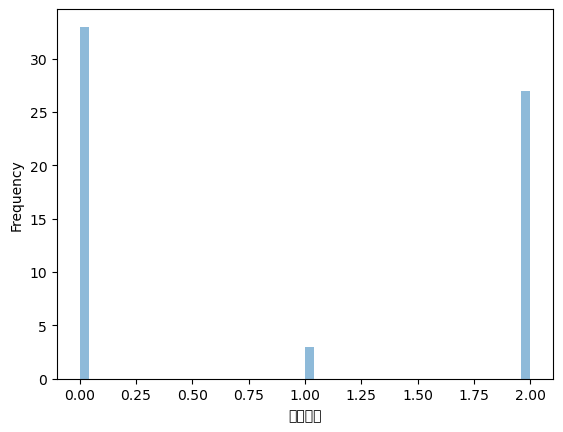

In [235]:
Val_pred = gbm.predict(X_val_data)
Val_pred = [list(x).index(max(x)) for x in Val_pred]
import matplotlib.pyplot as plt

# ヒストグラムを描画
plt.hist(Val_pred, bins=50, alpha=0.5, label='Val_pred')

# グラフのタイトルと軸ラベルを設定
plt.xlabel('推論結果')
plt.ylabel('Frequency')

# グラフを表示
plt.show()


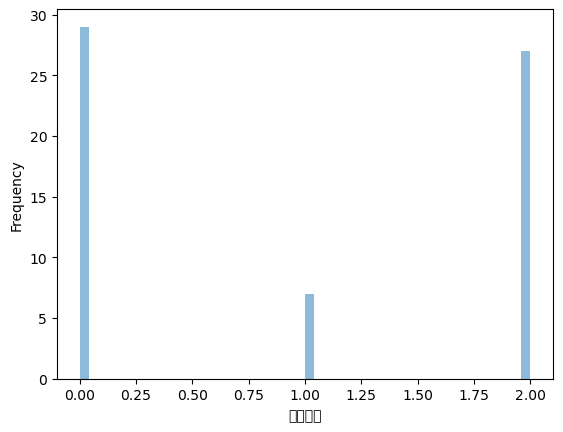

In [236]:
# ヒストグラムを描画
plt.hist(y_val, bins=50, alpha=0.5, label='Val_pred')

# グラフのタイトルと軸ラベルを設定
plt.xlabel('推論結果')
plt.ylabel('Frequency')

# グラフを表示
plt.show()

In [237]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, Val_pred)

# 精度を表示
print(f'Accuracy: {accuracy}')

Accuracy: 0.8095238095238095
